# Netflix data Analysis Project
This project aims to draw conclusions from the dataset of movies uploaded on **Netflix** in the time duration of *1902* - *2022*. The dataset was obtained from TheiScale.

We have to first preprocess the data such that easy Data Visualisation can be performed in order to answer the questions that follow.

Let us first import the **required libraries**.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let us read the CSV file into a dataframe called **df** with the **read_csv** function of the **Pandas** library.

In [125]:
df = pd.read_csv('mymoviedb.csv', lineterminator = "\n")

The CSV file has now been imported. Let us check the layout of the CSV file stored in the dataframe **df**.

In [126]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# Data Preprocessing
Here, we can see that the **Release_Date** field is of the type "*object*". We will need to correctly format it as the first step of the data preprocessing.

In [128]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

We see here that the **Genres** of the movies are all grouped together in a single row. We may need to **explode** the dataset by **Genre** to proceed with accurate visualisation.

In [129]:
df.duplicated().sum()

np.int64(0)

This shows that there are no duplicate entries in the dataset to handle.

In [130]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Above are the standard statistical calculations performed on the numerical fields using the **describe()** function.

Let us now format the **Release_Date** field into a **date and time** field which only contains the **year**, which will be the data that we need to solve our questions later on.

In [131]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print (df['Release_Date'].dtypes)

datetime64[ns]


This proves that the contents were successfully converted into a **datetime** format. We now need to strip the entries such that we only have the **year** left.

In [132]:
df['Release_Date'] = df['Release_Date'].dt.year


The procedure was successfully carried out. Let us check how the dataset looks now.

In [133]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


We can see that now under the **Release_Date** column, we  only have the years in which the movies were released.

For further visualisation, we also see that the **Overview**, **Original_Language** and **Poster_Url** columns provide no definite value during data analysis. Therefore, it is best that we omit those columns to make our data easier to read and visualise later on.

In [134]:
dropcols = ['Overview', 'Original_Language', 'Poster_Url']

df.drop (dropcols, axis = 1, inplace = True)

We have succesfully dropped the undesirable data from the dataset.

 Let us now categorize the **Vote_Average** column into four quartiles: *unpopular*, *mildly_popular*, *quite_popular* and *very_popular*. To do this, let us first write a function called **categorize**, which takes three arguments: the *dataframe*, the *column to categorize*, and the *list of labels to be assigned during categorization*.

In [135]:
def categorize (df, col, labels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

Now that the function has been defined, let us invoke it on the **Vote_Average** column to categorize it.

In [136]:
labels = ['unpopular', 'mildly_popular', 'quite_popular', 'very_popular']

categorize (df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['very_popular', 'mildly_popular', 'quite_popular', 'unpopular', NaN]
Categories (4, object): ['unpopular' < 'mildly_popular' < 'quite_popular' < 'very_popular']

The above output shows us that the column has been successfully categorized. We also see some **NaN** values which we will handle later on.

In [137]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,very_popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,very_popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,mildly_popular,Thriller
3,2021,Encanto,2402.201,5076,very_popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,quite_popular,"Action, Adventure, Thriller, War"


In [138]:
df['Vote_Average'].value_counts()

Vote_Average
unpopular         2467
very_popular      2450
quite_popular     2412
mildly_popular    2398
Name: count, dtype: int64

Above are the counts of the movies in each category by popularity. 

Let us now remove the **NaN** entries completely from the dataset using the **dropna()** function.

In [139]:
df.dropna (inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

We have successfully dropped all **NaN** valued rows in the dataset.

To now perform Genre based analyses on the dataset, we will need to explode the dataset such that every single entry has only a single Genre to its name. We will accomplish this using the **explode()** function.

In [140]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index (drop = True)


In [141]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,very_popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,very_popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,very_popular,Science Fiction
3,2022,The Batman,3827.658,1151,very_popular,Crime
4,2022,The Batman,3827.658,1151,very_popular,Mystery


The dataset has been fully exploded into an even bigger dataset where each row has only a single Genre and a single movie may have multiple entries.

In [142]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


# Data Visualisation

Now that the data preprocessing is complete, we can proceed with visualising the data and answering our questions. We will use the **matplotlib** and **seaborn** libraries.

1. What is the most frequent genre of movies released on Netflix?
2. What genre has the highest votes?
3. What movie has the highest popularity? What is its genre?
4. What movie has the lowest popularity? What is its genre?
5. Which year has the most movie releases?

Let us first set the style of our **seaborn** plots to **whitegrid**.

In [145]:
sns.set_style('whitegrid')

Now that the style has been set, we can proceed with solving the questions. 

To find the most frequently occuring genre, let us plot a **category plot** of the genres by count.

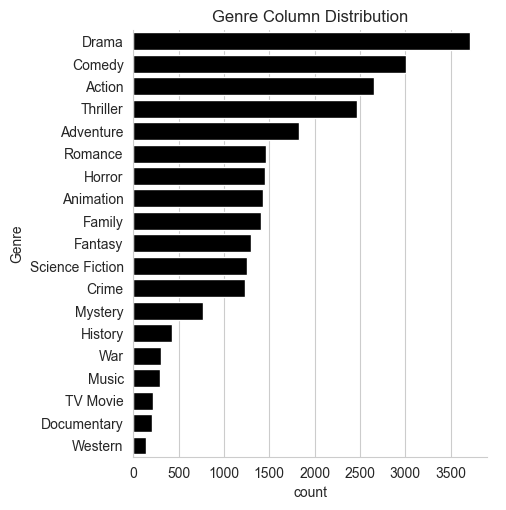

In [146]:
sns.catplot(df, y = 'Genre', kind = 'count', order = df['Genre'].value_counts().index, color = 'black')

plt.title("Genre Column Distribution")
plt.show()

Here, we can see that the **Drama** genre has had the most releases.

To find the genre with the highest votes, we will once again plot a **category plot** of the voting average categories by count.

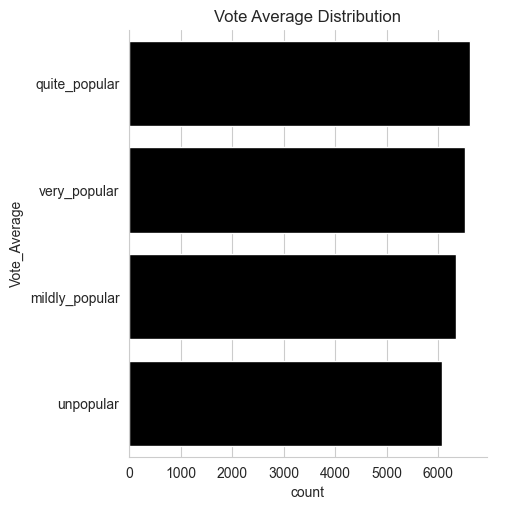

In [147]:
sns.catplot(df, y = 'Vote_Average', kind = 'count', order = df['Vote_Average'].value_counts().index, color = 'black')
plt.title('Vote Average Distribution')
plt.show()

We can hence conclude that the majority of movies landed up in the *quite_popular* category, i.e. between the **50th** percentile and the **75th** percentile.

To find out the most popular movie and its genre, we will perform a query operation on the dataset and only fetch those rows whose **Popularity** is equal to the maximum in that column.

In [148]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,very_popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,very_popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,very_popular,Science Fiction


Therefore, we see that **Spider-Man: No Way Home** is the most popular movie on Netflix and its Genres are **Action**, **Adventure** and **Science Fiction**.

Similarly, to find out the least popular movie on Netflix, we do almost the same operation, but we check for equality of the **Popularity** field with the **minimum** in the field.

In [149]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,quite_popular,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,quite_popular,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,quite_popular,History
25549,1984,Threads,13.354,186,very_popular,War
25550,1984,Threads,13.354,186,very_popular,Drama
25551,1984,Threads,13.354,186,very_popular,Science Fiction


Therefore, the least popular movies on Netflix are **The United States vs. Billie Holiday** with genres **Music**, **Drama** and **History**, and **Threads** with genres **War**, **Drama** and **Science Fiction**.

Lastly, to find the year with the most releases, we simply use the **hist()** function to plot a histogram of the counts of **Release_Date** occurences.

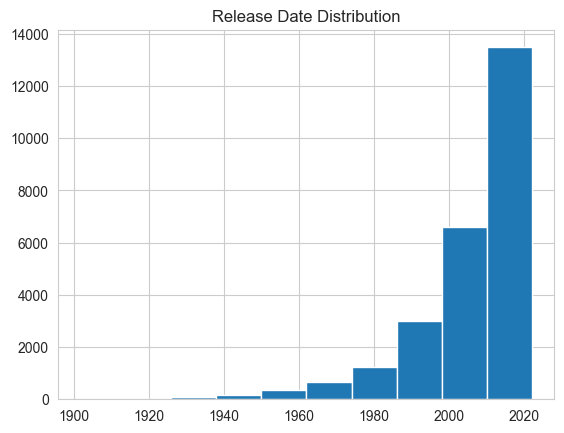

In [150]:

df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()

Therefore, it is clear that the number of movie releases has shot up at around **2020** and is on exponential growth since.